In [180]:
# Importar las librerías necesarias
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
from dust_extinction.parameter_averages import CCM89, F99
from synphot import units, config
from synphot import SourceSpectrum, SpectralElement, Observation, ExtinctionModel1D
from synphot.models import BlackBodyNorm1D
from synphot.spectrum import BaseUnitlessSpectrum
from synphot.reddening import ExtinctionCurve
from astroquery.simbad import Simbad
from astroquery.mast import Observations
from astropy.visualization import quantity_support
quantity_support() 

# Leer el archivo FITS y obtener las columnas de longitud de onda (WAVE) y flujo (FLUX)
t_lwr = Table.read('mastDownload/WUPPE/hd147888_454310_2/hd147888_454310_2_hw_vo.fits')
wav_UV = t_lwr['WAVE'][0,].quantity
UVflux = t_lwr['FLUX'][0,].quantity

# Realizar una consulta a la base de datos de SIMBAD para obtener magnitudes U, B, V
custom_query = Simbad()
custom_query.add_votable_fields('fluxdata(U)','fluxdata(B)','fluxdata(V)')
phot_table = custom_query.query_object('HD 147888')
Umag = phot_table['FLUX_U']
Bmag = phot_table['FLUX_B']
Vmag = phot_table['FLUX_V']

# Definir las longitudes de onda y flujos correspondientes a las bandas U, B, V
wav_U = 0.3660 * u.micron 
zeroflux_U_nu = 1.81E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_B = 0.4400 * u.micron
zeroflux_B_nu = 4.26E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_V = 0.5530 * u.micron
zeroflux_V_nu = 3.64E-23 * u.Watt/(u.m*u.m*u.Hz)

# Convertir los flujos de frecuencia (nu) a flujos espectrales
zeroflux_U = zeroflux_U_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_U))
zeroflux_B = zeroflux_B_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_B))
zeroflux_V = zeroflux_V_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_V))

# Calcular los flujos en las bandas U, B, V usando las magnitudes y flujos de referencia
Uflux = zeroflux_U * 10.**(-0.4 * Umag)
Bflux = zeroflux_B * 10.**(-0.4 * Bmag)
Vflux = zeroflux_V * 10.**(-0.4 * Vmag)

# Graficar los espectros UV y las magnitudes U, B, V
plt.plot(wav_UV, UVflux, 'm', label='UV')
plt.plot(wav_V, Vflux, 'ko', label='U, B, V')
plt.plot(wav_B, Bflux, 'ko')
plt.plot(wav_U, Uflux, 'ko')
plt.legend(loc='best')
plt.ylim(0, 3E-10)
plt.title('rho Oph')
plt.show()

# Definir el valor del coeficiente de extinción Rv y el valor de EBV (E(B-V))
Rv = 5.0  # Usualmente alrededor de 3, pero 5 para esta estrella en particular.
Ebv = 0.5
ext = F99(Rv=Rv)

# Graficar los espectros UV y las magnitudes U, B, V con corrección de extinción
plt.semilogy(wav_UV, UVflux, 'm', label='UV')
plt.semilogy(wav_V, Vflux, 'ko', label='U, B, V')
plt.semilogy(wav_B, Bflux, 'ko')
plt.semilogy(wav_U, Uflux, 'ko')
plt.semilogy(wav_UV, UVflux/ext.extinguish(wav_UV,Ebv=Ebv), 'b', label='dereddened: EBV=0.5, RV=5')
plt.semilogy(wav_V, Vflux/ext.extinguish(wav_V,Ebv=Ebv), 'ro', label='dereddened: EBV=0.5, RV=5')
plt.semilogy(wav_B, Bflux/ext.extinguish(wav_B,Ebv=Ebv), 'ro')
plt.semilogy(wav_U, Uflux/ext.extinguish(wav_U,Ebv=Ebv), 'ro')
plt.legend(loc='best')
plt.title('rho Oph')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'mastDownload/WUPPE/hd147888_454310_2/hd147888_454310_2_hw_vo.fits'

In [ ]:
HSTname="lista/mastDownload/HST/y22g0102t/y22g0102t_d0f.fits"
fits.info(HSTname)
hdul=fits.open(HSTname)

In [ ]:
from astropy.io import fits

# Leer el archivo FITS
hdul = fits.open('lista/mastDownload/HST/y22g0102t/y22g0102t_d0f.fits')

# Obtener los datos del espectro en la extensión PRIMARY
spectral_data = hdul[0].data

# Cerrar el archivo FITS
hdul.close()

# Ahora puedes trabajar con los datos del espectro en 'spectral_data'
# Por ejemplo, para visualizar el espectro:
import matplotlib.pyplot as plt
plt.plot(spectral_data)
plt.xlabel('Índice del píxel')
plt.ylabel('Flujo')
plt.title('Espectro de ciencia corregido')
plt.show()


In [ ]:
t_lwr = Table.read(HSTname)
t_lwr
wav_UV = t_lwr['WAVELENGTH'][0,].quantity
UVflux = t_lwr['FLUX'][0,].quantity

# Realizar una consulta a la base de datos de SIMBAD para obtener magnitudes U, B, V
custom_query = Simbad()
custom_query.add_votable_fields('fluxdata(U)','fluxdata(B)','fluxdata(V)')
phot_table = custom_query.query_object('HD 147888')
Umag = phot_table['FLUX_U']
Bmag = phot_table['FLUX_B']
Vmag = phot_table['FLUX_V']

# Definir las longitudes de onda y flujos correspondientes a las bandas U, B, V
wav_U = 0.3660 * u.micron 
zeroflux_U_nu = 1.81E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_B = 0.4400 * u.micron
zeroflux_B_nu = 4.26E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_V = 0.5530 * u.micron
zeroflux_V_nu = 3.64E-23 * u.Watt/(u.m*u.m*u.Hz)

# Convertir los flujos de frecuencia (nu) a flujos espectrales
zeroflux_U = zeroflux_U_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_U))
zeroflux_B = zeroflux_B_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_B))
zeroflux_V = zeroflux_V_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_V))

# Calcular los flujos en las bandas U, B, V usando las magnitudes y flujos de referencia
Uflux = zeroflux_U * 10.**(-0.4 * Umag)
Bflux = zeroflux_B * 10.**(-0.4 * Bmag)
Vflux = zeroflux_V * 10.**(-0.4 * Vmag)

# # Graficar los espectros UV y las magnitudes U, B, V
# plt.plot(wav_UV, UVflux, 'm', label='UV')
# plt.plot(wav_V, Vflux, 'ko', label='U, B, V')
# plt.plot(wav_B, Bflux, 'ko')
# plt.plot(wav_U, Uflux, 'ko')
# plt.legend(loc='best')
# plt.ylim(0, 3E-10)
# plt.title('rho Oph')
# plt.show()

# Definir el valor del coeficiente de extinción Rv y el valor de EBV (E(B-V))
Rv = 5.0  # Usualmente alrededor de 3, pero 5 para esta estrella en particular.
Ebv = 0.1
ext = F99(Rv=Rv)

# Graficar los espectros UV y las magnitudes U, B, V con corrección de extinción
plt.plot(wav_UV, UVflux, 'm', label='UV')
# plt.semilogy(wav_V, Vflux, 'ko', label='U, B, V')
# plt.semilogy(wav_B, Bflux, 'ko')
# plt.semilogy(wav_U, Uflux, 'ko')
# plt.semilogy(wav_UV, UVflux/ext.extinguish(wav_UV,Ebv=Ebv), 'b', label='dereddened: EBV=0.5, RV=5')
# plt.semilogy(wav_V, Vflux/ext.extinguish(wav_V,Ebv=Ebv), 'ro', label='dereddened: EBV=0.5, RV=5')
# plt.semilogy(wav_B, Bflux/ext.extinguish(wav_B,Ebv=Ebv), 'ro')
# plt.semilogy(wav_U, Uflux/ext.extinguish(wav_U,Ebv=Ebv), 'ro')
plt.legend(loc='best')
plt.grid()
plt.title('rho Oph')
plt.show()


# plotting spectrum

In [ ]:
HSTname="/Users/miguelandrade/Documents/github/GETspectrum/prueba/mastDownload/JWST/jw01085012001_02102_00001_nis/jw01085012001_02102_00001_nis_cal.fits"
fits.info(HSTname)
hdul=fits.open(HSTname)
t_lwr = Table.read(HSTname)
wave= fits.getdata(HSTname,4)
flux = fits.getdata(HSTname,4)
flux
# plt.plot(t_lwr["TIME"],t_lwr["VALUE"])
# wav_UV = t_lwr['WAVE'][0,].quantity
# UVflux = t_lwr['FLUX'][0,].quantity
# plt.semilogy(wav_UV,UVflux)

In [ ]:
from astropy.io import fits

# Leer el archivo FITS
hdul = fits.open('lista/mastDownload/HST/y22g0102t/y22g0102t_d0f.fits')

# Obtener los datos del espectro en la extensión PRIMARY
spectral_data = hdul[0].data
image_data = hdul[0].data
# Cerrar el archivo FITS
hdul.close()

# Ahora puedes trabajar con los datos del espectro en 'spectral_data'
# Por ejemplo, para visualizar el espectro:
# Imprimir algunos valores de píxeles para verificar
print("Valor del primer píxel:", image_data[0, 0])  # Píxel en la esquina superior izquierda
print("Valor del último píxel:", image_data[-1, -1])  # Píxel en la esquina inferior derecha
print("Valor máximo:", image_data.max())
print("Valor mínimo:", image_data.min())

# plotting image

In [ ]:
import requests
import io
import numpy as np
from astropy.table import Table, unique
from astropy.utils.data import download_file
from astropy.io import fits

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

# For output using Markdown.
from IPython.display import Markdown, display

# There are a number of relatively unimportant warnings, so suppress them:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
fits.info("lista/mastDownload/HST/oeum02050/oeum02050_jif.fits")

In [ ]:
HSTname="lista/mastDownload/HST/y22g0102t/y22g0102t_d0f.fits"
image = fits.getdata(HSTname)
plt.imshow(image, cmap='gray', norm=LogNorm())

# Para imagenes del Hubble

Cuando descargas un objeto del HST (Telescopio Espacial Hubble), obtienes varios archivos con diferentes nombres porque cada archivo contiene información específica sobre las observaciones realizadas. Aquí hay una breve explicación de algunos de los archivos comunes que puedes encontrar:

1. `oeum02050_asn.fits`: Este es un archivo de Asociación (Association) FITS, que contiene información sobre la asociación de múltiples exposiciones que se deben combinar o procesar juntas.

2. `oeum02050_flt.fits`: Este es el archivo FITS de la imagen "flatted" (nivelada). Contiene la imagen de ciencia corregida por los flats (imágenes de calibración que se utilizan para eliminar variaciones de respuesta del detector).

3. `oeum02050_raw.fits`: Este es el archivo FITS de la imagen sin procesar, que contiene los datos originales y sin procesar del detector.

4. `oeum02050_jif.fits`: Este archivo es una imagen de ciencia producida a partir de la calibración de ciencia de una exposición de campo de luz de Fuego Cruzado (Cross-Filter Fire Light), que es una técnica de observación especializada.

5. `oeum02050_jwt.fits`: Este archivo contiene información sobre las palabras clave (keywords) del archivo FITS.

6. `oeum02050_sx1.fits` y `oeum02050_sx2.fits`: Estos archivos pueden ser archivos FITS auxiliares que contienen datos o información adicional sobre la observación.

7. `oeum02050_wav.fits`: Este archivo contiene información sobre la calibración del espectro en función de la longitud de onda.

Estos son solo algunos ejemplos de los archivos que podrías encontrar al descargar un objeto del HST. La variedad de archivos está relacionada con la complejidad de las observaciones y los diferentes pasos de calibración y procesamiento que se realizan para obtener los datos finales listos para el análisis científico. Cada archivo tiene su propósito específico y contribuye a la calidad y utilidad de los datos observados.

import os
import numpy as np
from astropy import units as u
from ccdproc import CCDData
from scipy import stats
import matplotlib.pyplot as plt
from photutils import aperture_photometry, CircularAperture
%matplotlib inline
plt.style.use('classic')

spectra = CCDData.read('/home/dokeeffe/Downloads/PCyg_Light_002.fits', unit=u.adu)
spectra.shape

In [ ]:

import numpy as np
from astropy import units as u
from ccdproc import CCDData
from scipy import stats
import matplotlib.pyplot as plt
from photutils import aperture_photometry, CircularAperture
%matplotlib inline
plt.style.use('classic')

spectra = CCDData.read('lista/mastDownload/HST/y22g0102t/y22g0102t_d0f.fits', unit=u.adu)
spectra.shape

In [ ]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(spectra.data, cmap='gray', origin='lower', vmin=350, vmax=6000)

# plotting prueba

In [ ]:
# Importar las librerías necesarias
import pathlib
import matplotlib.pyplot as plt
# %matplotlib inline
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
# from dust_extinction.parameter_averages import CCM89, F99
# from synphot import units, config
# from synphot import SourceSpectrum, SpectralElement, Observation, ExtinctionModel1D
# from synphot.models import BlackBodyNorm1D
# from synphot.spectrum import BaseUnitlessSpectrum
# from synphot.reddening import ExtinctionCurve
# from astroquery.simbad import Simbad
# from astroquery.mast import Observations
# import numpy as np
# from ccdproc import CCDData
# from scipy import stats
# from photutils import aperture_photometry, CircularAperture
# plt.style.use('classic')

#archivo raw

In [ ]:
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

# Especificamos el nombre del archivo FITS que deseamos leer
name = "prueba/mastDownload/GALEX/3066005903744435497/3066005903744435497.fits"

# Mostramos información general sobre el contenido del archivo FITS
fits.info(name)

# Abrimos el archivo FITS y almacenamos su contenido en hdul (Header Data Unit List)
hdul = fits.open(name)

# Leemos el contenido del archivo FITS y almacenamos los datos en una tabla llamada 'a'
a = Table.read(name)

# Leemos los datos del HDU (Header Data Unit) "PRIMARY" del archivo FITS y almacenamos la imagen en la variable 'image'
image = fits.getdata(name)

# Imprimimos en la consola una línea de asteriscos para separar visualmente la información
print(100 * "*" + "\n")

# Imprimimos la imagen en la consola
print(image)

# Mostramos la imagen usando matplotlib y un mapa de color en escala de grises
plt.imshow(image, cmap='gray')

# Si deseas usar una escala logarítmica en la imagen, puedes descomentar la siguiente línea
# plt.imshow(image, cmap='gray', norm=LogNorm())

# Obtener la forma (dimensiones) de la imagen y mostrarlas en la consola
print(image.shape)


In [ ]:
fits.getheader(name,1)

In [ ]:
from astropy.io import fits
path="/Users/miguelandrade/Documents/github/GETspectrum/prueba/mastDownload/HST/x1590e02t/"
file_names = ["x1590e02t_c0f.fits", "x1590e02t_c1f.fits", "x1590e02t_q0f.fits", "x1590e02t_trl.fits", "x1590e02t_d0f.fits", "x1590e02t_dgr.fits", "x1590e02t_shf.fits", "x1590e02t_ulf.fits"]
for name in file_names:
    hdul = fits.open(path+name)
    # name2=path+name
    # image = fits.getdata(name2)
    # plt.imshow(image, cmap='gray', norm=LogNorm())
    print(100*"*")
    hdul.info()
    hdul.close()


In [ ]:
a=Table.read(name)
a

In [ ]:
image = fits.getdata(name)
# %matplotlib inline
plt.imshow(image, cmap='gray', norm=LogNorm())

In [ ]:
# Acceder a la columna "Seconds"
seconds_column = hdul[0].data["Seconds"]

# Imprimir los primeros 10 valores de la columna "Seconds"
# print(seconds_column[:10])


In [ ]:
# !conda install cos_functions

# GALEX

In [173]:
nameGalex="/Users/miguelandrade/Documents/github/GETspectrum/prueba/mastDownload/GALEX/3189573418518324437/3189573418518324437.fits"
dataHdul0=Table.read(nameGalex)
dataHdul0

WAVE,FLUX,SIGMA
float32[486],float32[486],float32[486]
1300.0 .. 2997.5,0.0 .. 1.263573e-14,-1.528037e-11 .. 5.223638e-15


In [175]:
h0=fits.getheader(nameGalex,1)
h0

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 5832 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'WAVE    '           / label for field                                
TFORM1  = '486E    '           / format of field                                
TTYPE2  = 'FLUX    '           / label for field                                
TFORM2  = '486E    '           / format of field                                
TTYPE3  = 'SIGMA   '        

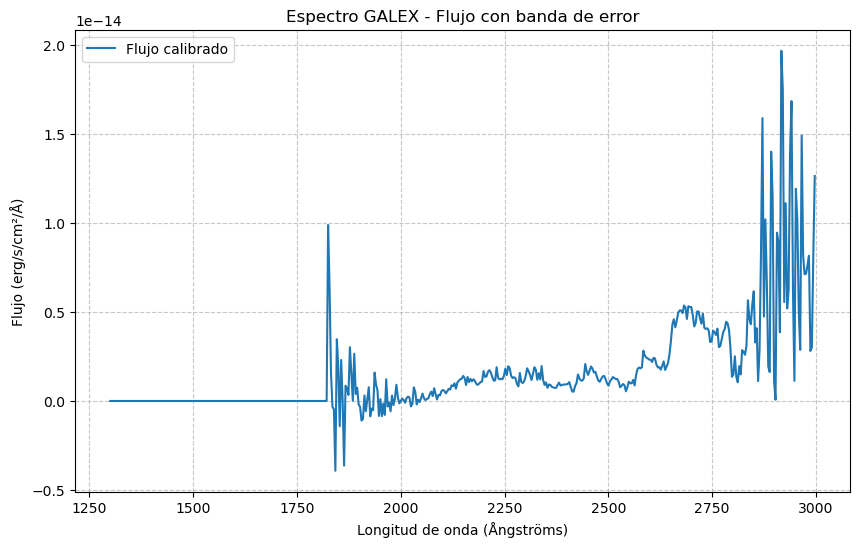

In [172]:
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np
from scipy.optimize import curve_fit


def plotgausian(valor):
    # Datos del espectro
    wave = dataHdul0["WAVE"][0,]
    flux = dataHdul0["FLUX"][0,]
    sigma = dataHdul0["SIGMA"][0,]  # Valores de incertidumbre

    # Calibración de flujo
    flux_calibrated = flux

    # Aplicar filtro gaussiano para suavizar el espectro (usando un valor inicial para sigma)
    initial_sigma = 3.0  # Valor inicial de sigma (ajusta según tus necesidades)
    flux_smoothed = scipy.ndimage.gaussian_filter(flux_calibrated, sigma=initial_sigma)

    # Ajuste de una función gaussiana al pico del espectro para obtener la FWHM
    def gaussian(x, amplitude, mean, sigma):
        return amplitude * np.exp(-0.5 * ((x - mean) / sigma)**2)

    # Encontrar el valor máximo del flujo para estimar la posición del pico
    peak_position = wave[np.argmax(flux_smoothed)]

    # Definir un rango alrededor del pico para realizar el ajuste
    window_size = 20  # Ajusta según el tamaño de la ventana alrededor del pico
    window_indices = np.logical_and(wave >= peak_position - window_size, wave <= peak_position + window_size)

    # Realizar el ajuste gaussiano dentro de la ventana
    popt, _ = curve_fit(gaussian, wave[window_indices], flux_smoothed[window_indices], p0=[np.max(flux_smoothed), peak_position, initial_sigma])

    # Obtener la FWHM a partir del ajuste gaussiano
    FWHM = 2.3548 * popt[2]

    # Calcular el sigma utilizando la FWHM (por ejemplo, usando un factor constante)
    sigma_gaussian = FWHM / 2.355  # Ajusta el factor 2.355 según tus necesidades

    # Aplicar el filtro gaussiano con el sigma calculado
    flux_smoothed_final = scipy.ndimage.gaussian_filter(flux_calibrated, sigma=valor)

    # Visualización del espectro calibrado y suavizado
    plt.figure(figsize=(10, 6))
    plt.plot(wave, flux_calibrated, label="Flujo calibrado")
    plt.plot(wave, flux_smoothed_final, label="Flujo suavizado (filtro gaussiano)")
    plt.xlabel("Longitud de onda (Ångströms)")
    plt.xlim(1400,2900)
    plt.ylabel("Flujo")
    plt.title("Espectro GALEX - Flujo y Flujo suavizado con Gaussiano : "+str(valor))
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

    print("Ancho de banda (sigma) utilizado:", sigma_gaussian)

for each in range(10,12):
    plotgausian(each/10)

In [176]:
fits.info(archivoGalex)
tabla = Table.read(archivoGalex)
tabla

Filename: /Users/miguelandrade/Documents/github/GETspectrum/prueba/mastDownload/GALEX/3189573418518324437/3189573418518324437.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     543   ()      
  1  Spectral Container    1 BinTableHDU    125   1R x 3C   [486E, 486E, 486E]   


WAVE,FLUX,SIGMA
float32[486],float32[486],float32[486]
1300.0 .. 2997.5,0.0 .. 1.263573e-14,-1.528037e-11 .. 5.223638e-15


# HUT

In [189]:
import os
import glob

directorio = "prueba/mastDownload/HUT/HUT103201"  # Reemplaza "ruta_del_directorio" con la ruta del directorio que deseas explorar

# Usar la función glob para obtener la lista de archivos FITS en el directorio
archivos_fits = glob.glob(os.path.join(directorio, "*.fits"))

# Imprimir la lista de archivos FITS
for archivo in archivos_fits:
    print(archivo)


prueba/mastDownload/HUT/HUT103201/HUT103201cal.fits
prueba/mastDownload/HUT/HUT103201/hut103201cal_vo.fits
prueba/mastDownload/HUT/HUT103201/HUT10320100tv.fits
prueba/mastDownload/HUT/HUT103201/HUT103201idf.fits


In [193]:
tablas_combinadas = []
for each in archivos_fits:
    fits.info(each)
    try:
        a=Table.read(each)
        tablas_combinadas.append(a)
        print(a)
    except:
        print("*"*100)
        print("No se encontro en :", str(each))
        print("*"*100)
    finally:
        print("\n")
    print("*"*100)

Filename: prueba/mastDownload/HUT/HUT103201/HUT103201cal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     160   ()      
  1  SPECTRUM      1 BinTableHDU     29   2048R x 5C   [1E, 1E, 1E, 1J, 1E]   
  2  NIGHT SPECTRUM    1 BinTableHDU     29   2048R x 5C   [1E, 1E, 1E, 1J, 1E]   
   WAVE            FLUX                 ERROR         COUNTS   WEIGHTS   
ANGSTROMS ERG CM^-2 S^-1 ANG^-1 ERG CM^-2 S^-1 ANG^-1 COUNTS    COUNTS   
--------- --------------------- --------------------- ------ ------------
   827.36        -4.2552357e-14         2.2082859e-14      0  -0.04268046
827.87335         -4.224997e-14         2.1925932e-14      0  -0.04268046
 828.3867        -4.1951506e-14         2.1771042e-14      0  -0.04268046
 828.9001          -4.16569e-14         2.1618154e-14      0  -0.04268046
829.41345         -4.136608e-14         2.1467232e-14      0  -0.04268046
 829.9268        -4.1078977e-14         2.1318239e-14      0  -0.042680

AttributeError: 'list' object has no attribute 'shape'